In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df['bedrooom'].fillna(df['bedroom'].mean(), inplace = True)


NameError: name 'df' is not defined

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
reg = LinearRegression()
reg.fit(df[['area','bedrooom','age']],df.price)

NameError: name 'df' is not defined

In [ ]:
X = dataset.iloc[:, : -1].values
y = dataset.iloc[:, -1].values

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize and fit GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 10}
Best Score: 0.9523809523809523


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [27]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


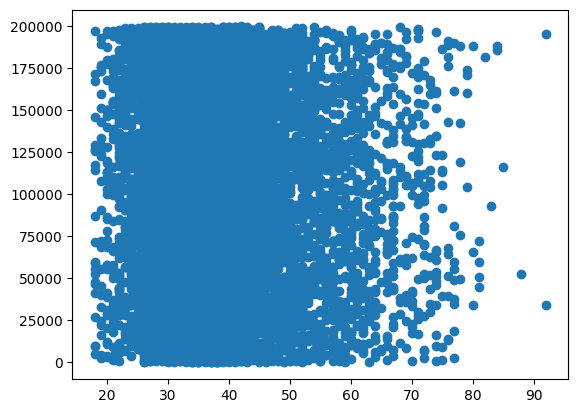

In [31]:
plt.scatter(dataset['Age'], dataset['EstimatedSalary'])

In [22]:
exit_counts = dataset.groupby('Gender')['Exited'].sum()

In [40]:
dataset.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [23]:
exit_counts

,Exited
Gender,
Female,1139
Male,898


<BarContainer object of 2 artists>

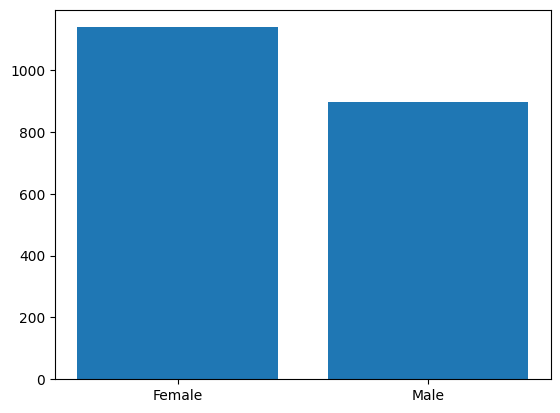

In [25]:
plt.bar(exit_counts.index, exit_counts.values)

In [52]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [53]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [54]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()

In [57]:
X[:, 2] = le.fit_transform(X[:, 2])

In [58]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [61]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')


In [62]:
X = np.array(ct.fit_transform(X))

In [66]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [75]:
print(X)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


In [73]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X = sc.fit_transform(X)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [76]:
X_train

array([[-1.00280393, -0.57873591,  1.74273971, ...,  0.64609167,
        -1.03067011,  1.10838187],
       [-1.00280393,  1.72790383, -0.57380915, ...,  0.64609167,
         0.97024255, -0.74759209],
       [ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011,  1.48746417],
       ...,
       [ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011,  1.41441489],
       [-1.00280393, -0.57873591,  1.74273971, ...,  0.64609167,
         0.97024255,  0.84614739],
       [-1.00280393,  1.72790383, -0.57380915, ...,  0.64609167,
        -1.03067011,  0.32630495]])

In [77]:
import tensorflow as tf

In [78]:
tf.__version__

'2.18.0'

In [80]:
ann = tf.keras.models.Sequential()

In [82]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [83]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [84]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [85]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [89]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 15)

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8327 - loss: 0.4044
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8287 - loss: 0.4093
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8390 - loss: 0.3957
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8277 - loss: 0.4085
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8442 - loss: 0.3871
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8340 - loss: 0.3970
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8356 - loss: 0.3961
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8367 - loss: 0.3874
Epoch 9/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8467 - loss: 0.3754
Epoch 10/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8435 - loss: 0.3770
Epoch 11/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8485 - loss: 0.3685
Epoch 12/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [2]:
stack = []
stack.append(4)
stack.append(5)
stack.append(6)
stack.append(7)

In [3]:
stack

[4, 5, 6, 7]

In [5]:
stack[-1]

7

In [6]:
stack.pop()

7

In [7]:
stack

[4, 5, 6]

In [8]:
class Stack():
  def __init__(self):
    self.list_stack = []

  def push(self, data):
    self.list_stack.append(data)

  def is_empty(self):
    if not self.list_stack:
      return True
    else:
      return False

  def pop(self):
    return self.list_stack.pop()

  def peek(self):
    if self.list_stack == []:
      return None
    else:
      return self.list_stack[-1]
  def __repr__(self):
    return repr(self.list_stack)



In [9]:
new_stack = Stack()

In [10]:
new_stack.push(4)
new_stack.push(5)
new_stack.push(6)
new_stack.push(7)

In [11]:
new_stack


[4, 5, 6, 7]

In [12]:
new_stack.pop()

7

In [13]:
new_stack.peek()

6

In [14]:
new_stack.is_empty()

False

In [79]:
def balanced_brackets(str1):
    stack = []
    dict1 = {'(': ')', '[': ']', '{': '}'}

    for char in str1:
      if char in dict1:
        stack.append(char)
      elif char in dict1.values():
        if not stack or dict1[stack.pop()]!=char:
          return False
    return not stack




In [80]:
# Example usage
print(balanced_brackets("{[()]}"))  # True
print(balanced_brackets("{[(])}"))  # False
print(balanced_brackets("{{[[(())]]}}"))  # True

True
False
True


In [81]:
balanced_brackets('{[()]')

False

In [82]:
lst1= ( 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z')


In [84]:
for i in range(len(lst1)):
  print(lst1[i])

a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z


In [85]:
for count, item in enumerate(lst1):
  print(count, item)

0 a
1 b
2 c
3 d
4 e
5 f
6 g
7 h
8 i
9 j
10 k
11 l
12 m
13 n
14 o
15 p
16 q
17 r
18 s
19 t
20 u
21 v
22 w
23 x
24 y
25 z


In [86]:
 a =[count for count in range(len(lst1))]

In [87]:
a

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

In [88]:
b = [item for item in lst1]

In [89]:
b

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [90]:
A = set(a)

In [91]:
B = set(b)

In [99]:
def linear_search(item, my_list):
  i = 0
  found = False

  while i<len(my_list) and found == False:
    if my_list[i]== item:
      found = True
    else:
      i = i + 1

  return found

In [100]:
test= [6,5,8,2,3,45,85]
linear_search(5, test)

True

In [101]:
linear_search(10, test)

False